In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True);

Mounted at /content/gdrive


In [2]:
import os;
API_TOKEN_JSON = {"username":"sharadchandakacherla","key":"d2abf8872ee1ed1665ac3513f95d729d"};
os.environ['KAGGLE_USERNAME'] = API_TOKEN_JSON["username"];
os.environ['KAGGLE_KEY'] = API_TOKEN_JSON["key"]; 

In [3]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import time
#from keras.applications.mobilenet import MobileNet
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
#from sklearn.metrics import auc
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
prefix="/content/gdrive/MyDrive/Colab Notebooks/datasets/asl_alphabet";
train_dir = "{0}/asl_alphabet_train/asl_alphabet_train/".format(prefix);
test_dir =  "{0}/asl_alphabet_test/asl_alphabet_test/".format(prefix);
X_path="{0}/X.npy".format(prefix);
y_path="{0}/y.npy".format(prefix);

X_path_larger="{0}/XL.npy".format(prefix);
y_path_larger="{0}/yL.npy".format(prefix);
X_path_smaller="{0}/XS.npy".format(prefix);
y_path_smaller="{0}/yS.npy".format(prefix);

In [5]:
!ls -lr /content/gdrive/MyDrive/'Colab Notebooks'/datasets/asl_alphabet

total 5098353
-rw------- 1 root root     696128 Nov 28 00:15 y.npy
-rw------- 1 root root 5220000128 Nov 28 00:15 X.npy
drwx------ 2 root root       4096 Nov 27 02:42 saved_models
drwx------ 2 root root       4096 Nov 27 02:37 checkpoints
drwx------ 2 root root       4096 Nov 26 06:34 asl_alphabet_train
drwx------ 2 root root       4096 Nov 26 06:34 asl_alphabet_test


In [ ]:
imageSize=150
from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """

    if os.path.exists(X_path):
      X = np.load(X_path);
      y = np.load(y_path);
    else:
      X = []
      y = []
      for folderName in os.listdir(folder):
          if not folderName.startswith('.'):
              if folderName in ['A']:
                  label = 0
              elif folderName in ['B']:
                  label = 1
              elif folderName in ['C']:
                  label = 2
              elif folderName in ['D']:
                  label = 3
              elif folderName in ['E']:
                  label = 4
              elif folderName in ['F']:
                  label = 5
              elif folderName in ['G']:
                  label = 6
              elif folderName in ['H']:
                  label = 7
              elif folderName in ['I']:
                  label = 8
              elif folderName in ['J']:
                  label = 9
              elif folderName in ['K']:
                  label = 10
              elif folderName in ['L']:
                  label = 11
              elif folderName in ['M']:
                  label = 12
              elif folderName in ['N']:
                  label = 13
              elif folderName in ['O']:
                  label = 14
              elif folderName in ['P']:
                  label = 15
              elif folderName in ['Q']:
                  label = 16
              elif folderName in ['R']:
                  label = 17
              elif folderName in ['S']:
                  label = 18
              elif folderName in ['T']:
                  label = 19
              elif folderName in ['U']:
                  label = 20
              elif folderName in ['V']:
                  label = 21
              elif folderName in ['W']:
                  label = 22
              elif folderName in ['X']:
                  label = 23
              elif folderName in ['Y']:
                  label = 24
              elif folderName in ['Z']:
                  label = 25
              elif folderName in ['del']:
                  label = 26
              elif folderName in ['nothing']:
                  label = 27
              elif folderName in ['space']:
                  label = 28           
              else:
                  label = 29
              for image_filename in tqdm(os.listdir(folder + folderName)):
                  img_file = cv2.imread(folder + folderName + '/' + image_filename)
                  if img_file is not None:
                      img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                      img_arr = np.asarray(img_file)
                      X.append(img_arr)
                      y.append(label)
              
      X = np.asarray(X)
      with open(X_path, 'wb') as f:
        np.save(f, X);
      y = np.asarray(y)
      with open(y_path, 'wb') as f:
        np.save(f, y);
    return X,y
X_train, y_train = get_data(train_dir);
#X_test, y_test= get_data(test_dir) # Too few images

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).    
# from keras.utils.np_utils import to_categorical
# y_trainHot = to_categorical(y_train, num_classes = 30)
# y_testHot = to_categorical(y_test, num_classes = 30)

In [ ]:
imageSize=150
from tqdm import tqdm
def get_dataV2(folder):
    """
    Load the data and labels from the given folder.
    """

    if os.path.exists(X_path_smaller):
      X = np.load(X_path_smaller);
      y = np.load(y_path_smaller);
    else:
      X = []
      y = []
      for folderName in os.listdir(folder):
          if not folderName.startswith('.'):
              if folderName in ['A']:
                  label = 0
              elif folderName in ['B']:
                  label = 1
              elif folderName in ['C']:
                  label = 2
              elif folderName in ['D']:
                  label = 3
              elif folderName in ['E']:
                  label = 4
              elif folderName in ['F']:
                  label = 5
              elif folderName in ['G']:
                  label = 6
              elif folderName in ['H']:
                  label = 7
              elif folderName in ['I']:
                  label = 8
              elif folderName in ['J']:
                  label = 9
              elif folderName in ['K']:
                  label = 10
              elif folderName in ['L']:
                  label = 11
              elif folderName in ['M']:
                  label = 12
              elif folderName in ['N']:
                  label = 13
              elif folderName in ['O']:
                  label = 14
              elif folderName in ['P']:
                  label = 15
              elif folderName in ['Q']:
                  label = 16
              elif folderName in ['R']:
                  label = 17
              elif folderName in ['S']:
                  label = 18
              elif folderName in ['T']:
                  label = 19
              elif folderName in ['U']:
                  label = 20
              elif folderName in ['V']:
                  label = 21
              elif folderName in ['W']:
                  label = 22
              elif folderName in ['X']:
                  label = 23
              elif folderName in ['Y']:
                  label = 24
              elif folderName in ['Z']:
                  label = 25
              elif folderName in ['del']:
                  label = 26
              elif folderName in ['nothing']:
                  label = 27
              elif folderName in ['space']:
                  label = 28           
              else:
                  label = 29
              list_of_items = os.listdir(folder + folderName);
              reduced_len_items = int(len(list_of_items)/2);
              reduced_len_items_np = list_of_items[:reduced_len_items];
              for image_filename in tqdm(reduced_len_items_np):
                  img_file = cv2.imread(folder + folderName + '/' + image_filename)
                  if img_file is not None:
                      img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                      img_arr = np.asarray(img_file)
                      X.append(img_arr)
                      y.append(label)
              
      X = np.asarray(X)
      with open(X_path_smaller, 'wb') as f:
        np.save(f, X);
      y = np.asarray(y)
      with open(y_path_smaller, 'wb') as f:
        np.save(f, y);
    return X,y
X_train, y_train = get_dataV2(train_dir);

 56%|█████▌    | 836/1500 [01:21<00:36, 18.21it/s]

In [ ]:
# Shuffle data to permit further subsampling
# from sklearn.utils import shuffle
# X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
# X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
# X_train = X_train[:30000]
# X_test = X_test[:30000]
# y_trainHot = y_trainHot[:30000]
# y_testHot = y_testHot[:30000]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2) 


val_perc = 0.10;
val_count = int(np.floor(X_train.shape[0]*0.1));
X_val = X_train[-val_count:];
y_val = y_train[-val_count:]
X_train = X_train[:-val_count];
y_train = y_train[:-val_count];

# Encode labels to hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).    
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 30)
y_testHot = to_categorical(y_test, num_classes = 30)
y_valHot = to_categorical(y_val, num_classes = 30)

#Shuffle data to permit further subsampling
from sklearn.utils import shuffle
X_train, y_trainHot = shuffle(X_train, y_trainHot, random_state=13)
X_test, y_testHot = shuffle(X_test, y_testHot, random_state=13)
X_val, y_val = shuffle(X_val, y_val, random_state=13)

In [ ]:
print(y_trainHot.shape)
print(y_valHot.shape)
print(y_testHot.shape)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(62640, 30)
(6960, 30)
(17400, 30)
(62640, 50, 50, 3)
(6960, 50, 50, 3)
(17400, 50, 50, 3)


In [ ]:
unq_labels, counts = np.unique(y_test, return_counts=True)
print(unq_labels);
print( counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[601 553 578 590 584 615 600 637 604 593 628 594 610 621 617 591 592 582
 631 590 620 605 602 595 564 612 580 603 608]


In [ ]:
unq_labels_tr, counts_tr = np.unique(y_train, return_counts=True)
print(unq_labels_tr);
print( counts_tr);

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
[2167 2204 2175 2195 2178 2163 2162 2132 2144 2169 2122 2142 2145 2164
 2148 2156 2159 2164 2153 2151 2130 2160 2149 2153 2199 2161 2174 2157
 2164]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}


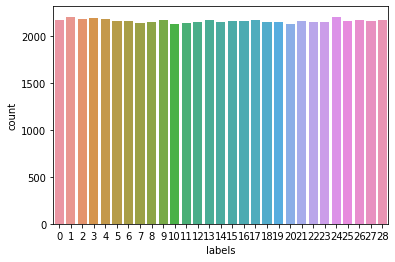

In [ ]:
map_characters = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space', 29: 'other'}
dict_characters=map_characters
import seaborn as sns
df = pd.DataFrame()
df["labels"]=y_train
lab = df['labels']
dist = lab.value_counts()
sns.countplot(lab)
print(dict_characters)

In [ ]:
# Helper Functions  Learning Curves and Confusion Matrix

from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

class MetricsCheckpoint(Callback):
    """Callback that saves metrics after each epoch"""
    def __init__(self, savepath):
        super(MetricsCheckpoint, self).__init__()
        self.savepath = savepath
        self.history = {}
    def on_epoch_end(self, epoch, logs=None):
        for k, v in logs.items():
            self.history.setdefault(k, []).append(v)
        np.save(self.savepath, self.history)

def plotKerasLearningCurve():
    plt.figure(figsize=(10,5))
    metrics = np.load('logs.npy')[()]
    filt = ['acc'] # try to add 'loss' to see the loss learning curve
    for k in filter(lambda x : np.any([kk in x for kk in filt]), metrics.keys()):
        l = np.array(metrics[k])
        plt.plot(l, c= 'r' if 'val' not in k else 'b', label='val' if 'val' in k else 'train')
        x = np.argmin(l) if 'loss' in k else np.argmax(l)
        y = l[x]
        plt.scatter(x,y, lw=0, alpha=0.25, s=100, c='r' if 'val' not in k else 'b')
        plt.text(x, y, '{} = {:.4f}'.format(x,y), size='15', color= 'r' if 'val' not in k else 'b')   
    plt.legend(loc=4)
    plt.axis([0, None, None, None]);
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.ylabel('Accuracy')

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

In [ ]:
pre_trained_prefix = "/content/gdrive/MyDrive/Colab Notebooks/datasets/pre_trained_models"
weight_path1 = '{0}/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'.format(pre_trained_prefix);
weight_path2 = '{0}/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'.format(pre_trained_prefix);

import time;
time1 = str(time.time());
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/datasets/asl-alphabet/checkpoints_for_vgg16/vgg16_{0}.ckpt".format(time);
checkpoint_dir = os.path.dirname(checkpoint_path);
saved_model_dir= "/content/gdrive/MyDrive/Colab Notebooks/datasets/asl_alphabet/saved_models"
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
pickled_path = "/content/gdrive/MyDrive/Colab Notebooks/datasets/vgg16/pickled/";
logs_path = "/content/gdrive/MyDrive/Colab Notebooks/datasets/vgg16/logs_{0}".format(time1);

In [ ]:
!mkdir -p /content/gdrive/MyDrive/'Colab Notebooks'/datasets/vgg16/

In [ ]:
import pickle;
def train(xtrain,ytrain,xval,yval,xtest,ytest,pretrainedmodel,classweight,numclasses,numepochs,optimizer,labels):
    base_model = pretrainedmodel # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    #callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    #model.summary()
    # Fit model this take a lot of time, ~1189 seconds for one epoch
    val_dat =(xval,yval);
    #print(type(xtest));
    weights_dict = {i:w for i,w in enumerate(classweight)}
    history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=weights_dict, validation_data=val_dat, verbose=1,callbacks = [MetricsCheckpoint(logs_path), cp_callback])
    with open('{0}/trainHistoryDict'.format(pickled_path), 'wb') as file_pi:
      pickle.dump(history.history, file_pi);
    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
    y_pred = model.predict(xtest);
    model.save('{0}/asl_alpabet_resnet_v2_{1}.h5'.format(saved_model_dir, time1));

    label_in_testing=np.where(ytest > 0)[1];
    common_keys =list(set(label_in_testing) & set(labels.keys()));
    labels_for_metrics={x: labels[x] for x in common_keys};

    classification_report = sklearn.metrics.classification_report(label_in_testing, np.argmax(y_pred, axis=1), target_names=list(labels_for_metrics.values()));
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    return model,history,score,confusion_mtx,classification_report;

def getModelWithTrainedWeights(pre_trained_model, numclasses, trained_weights_dir, optimizer):
    base_model = pre_trained_model;
    x = base_model.output;
    x = Flatten()(x);
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions);

    for layer in base_model.layers:
        layer.trainable = False
    print("compiling untrained model");
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    #loading old weights
    print("loading weights");
    model.load_weights(trained_weights_dir);
    return model;

def evaluateModelWithLoadedWeights(model, test_images, test_labels):
    loss, acc = model.evaluate(test_images, test_labels, verbose=2);
    print("Untrained model, accuracy: {:5.2f}%".format(100 * acc));

def predictUsingTrainedModel(model,X_test):
    y_pred = model.predict(X_test, verbose=0);
    return y_pred;

def printMetricsPostPrediction(ytest, map_characters):
    label_in_testing=np.where(ytest > 0)[1];
    common_keys =list(set(label_in_testing) & set(map_characters.keys()));
    labels_for_metrics={x: map_characters[x] for x in common_keys};
    classification_report=sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels_for_metrics.values()))
    print('\n', classification_report, sep='');
    return labels_for_metrics, classification_report;

def getConfusionMatrix(ytest, y_pred):
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    Y_true = np.argmax(ytest,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes);
    return confusion_mtx;

In [ ]:
character_labels = map_characters;
class_weight1 = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train);
pretrained_VGG16_model= VGG16(weights = weight_path1, include_top=False, input_shape=(imageSize, imageSize, 3));
optimizer1 = keras.optimizers.Adam();
optimizer2 = keras.optimizers.RMSprop(learning_rate=0.0001);
#val_dat =(X_val, y_valHot);

print("training started")
model,history,score,confusion_mtx,classification_report=train(X_train, y_trainHot, X_val, y_valHot,X_test, y_testHot,pretrained_VGG16_model, class_weight1,30,10,optimizer1,character_labels);
print("training done")

training started
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 

In [ ]:
with open('{0}/model_vgg16_{1}'.format(pickled_path,time1), 'wb') as file_pi:
  pickle.dump(model, file_pi);
  
with open('{0}/score_vgg16_{1}'.format(pickled_path,time1), 'wb') as file_pi:
  pickle.dump(score, file_pi);

with open('{0}/confusion_mtx_vgg16_{1}'.format(pickled_path,time1), 'wb') as file_pi:
  pickle.dump(confusion_mtx, file_pi);

with open('{0}/classification_vgg16_{1}'.format(pickled_path,time1), 'wb') as file_pi:
  pickle.dump(classification_report, file_pi);

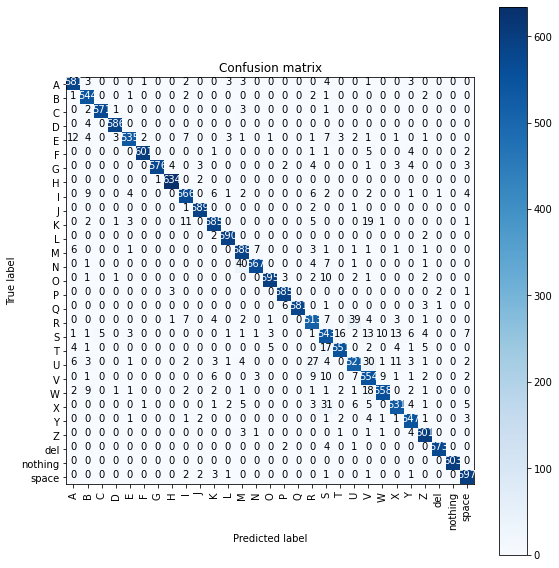

In [ ]:
map_characters2 = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: 'del', 27: 'nothing', 28: 'space'}
plot_confusion_matrix(confusion_mtx, classes = list(map_characters2.values()))
plt.show()

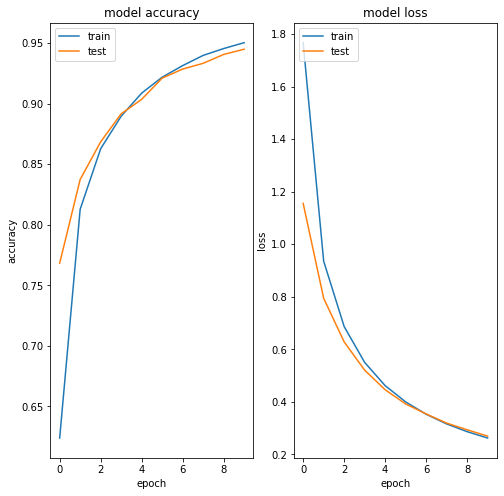

In [ ]:
plot_learning_curve(history)
plt.show()

In [ ]:
print(classification_report)

              precision    recall  f1-score   support

           A       0.95      0.97      0.96       601
           B       0.93      0.98      0.96       553
           C       0.99      0.99      0.99       578
           D       0.99      0.99      0.99       590
           E       0.97      0.92      0.94       584
           F       0.99      0.98      0.99       615
           G       1.00      0.96      0.98       600
           H       0.99      1.00      0.99       637
           I       0.94      0.94      0.94       604
           J       0.98      0.99      0.99       593
           K       0.95      0.93      0.94       628
           L       0.98      0.99      0.99       594
           M       0.90      0.96      0.93       610
           N       0.98      0.91      0.95       621
           O       0.98      0.96      0.97       617
           P       0.98      0.99      0.98       591
           Q       1.00      0.98      0.99       592
           R       0.88    

In [ ]:
metrics = printMetricsPostPrediction(y_testHot, character_labels);
print(metrics);


              precision    recall  f1-score   support

           A       0.85      0.90      0.87       561
           B       0.87      0.95      0.91       576
           C       0.99      0.99      0.99       598
           D       0.99      0.98      0.98       624
           E       0.88      0.87      0.88       589
           F       0.95      0.97      0.96       555
           G       0.96      0.94      0.95       617
           H       0.98      0.97      0.97       618
           I       0.91      0.87      0.89       591
           J       0.95      0.95      0.95       557
           K       0.90      0.89      0.90       663
           L       0.96      1.00      0.98       629
           M       0.85      0.90      0.88       609
           N       0.92      0.87      0.89       616
           O       0.96      0.96      0.96       589
           P       0.93      0.99      0.96       589
           Q       1.00      0.97      0.98       614
           R       0.84   

In [ ]:
cm= getConfusionMatrix(y_testHot, y_pred);
print(cm);

[[506   6   0   0   4   2   0   0   0   0   5   4   4   0   1   0   0   0
    2   5   4   0   5   3   7   3   0   0   0]
 [  5 550   0   0   5   0   0   0   1   0   0   0   1   1   1   0   0   3
    0   0   5   0   0   0   0   4   0   0   0]
 [  0   2 591   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   4   0   0   0   0   0   0   0   0]
 [  0   1   0 611   0   0   0   0   0   0   0   0   0   0   3   1   0   1
    0   0   4   1   0   0   0   1   0   0   1]
 [ 32   8   0   0 513  14   0   0   2   0   0   2   3   0   1   0   0   1
    3   2   2   1   0   1   0   4   0   0   0]
 [  1   0   0   2   1 537   0   0   0   0   3   0   0   0   2   0   0   1
    1   1   0   0   0   0   2   0   0   0   4]
 [  0   0   0   0   0   1 581   8   0   7   0   0   0   0   0   2   0   5
    0   0   1   1   0   1   1   0   0   0   9]
 [  0   0   0   0   0   0  11 597   0   3   0   1   0   0   0   1   0   0
    0   0   1   0   0   0   4   0   0   0   0]
 [  1  13   0   0  11   1   0   

In [ ]:
import timeit;
timeit.timeit(lambda: model.predict(X_test[0:1], verbose=0), number=1000)

45.00219257499998

In [ ]:
!nvidia-smi

Sun Nov 27 22:58:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |   5048MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
plot_confusion_matrix(cm, )

TypeError: ignored

In [ ]:
loaded_weight_model = getModelWithTrainedWeights(pretrained_VGG16_model, numclasses=30, trained_weights_dir = checkpoint_path, optimizer= optimizer1);
evaluateModelWithLoadedWeights(loaded_weight_model, X_test, y_testHot);
y_pred = predictUsingTrainedModel(loaded_weight_model,X_test);
labels_for_metrics, classification_report = printMetricsPostPrediction(y_testHot, character_labels);
print(classification_report);
cm= getConfusionMatrix(y_testHot, y_pred);
print(cm);


compiling untrained model
loading weights
544/544 - 16s - loss: 0.4402 - accuracy: 0.9098 - 16s/epoch - 30ms/step
Untrained model, accuracy: 90.98%

              precision    recall  f1-score   support

           A       0.87      0.90      0.88       606
           B       0.87      0.95      0.91       643
           C       0.99      0.99      0.99       601
           D       0.98      0.96      0.97       596
           E       0.91      0.88      0.89       599
           F       0.96      0.98      0.97       567
           G       0.96      0.94      0.95       580
           H       0.98      0.97      0.98       618
           I       0.92      0.88      0.90       586
           J       0.96      0.96      0.96       586
           K       0.90      0.87      0.88       587
           L       0.94      1.00      0.97       601
           M       0.84      0.92      0.88       573
           N       0.94      0.88      0.91       639
           O       0.96      0.94      0

NameError: ignored

In [ ]:
print(classification_report);
cm= getConfusionMatrix(y_testHot, y_pred);
print(cm);

              precision    recall  f1-score   support

           A       0.87      0.90      0.88       606
           B       0.87      0.95      0.91       643
           C       0.99      0.99      0.99       601
           D       0.98      0.96      0.97       596
           E       0.91      0.88      0.89       599
           F       0.96      0.98      0.97       567
           G       0.96      0.94      0.95       580
           H       0.98      0.97      0.98       618
           I       0.92      0.88      0.90       586
           J       0.96      0.96      0.96       586
           K       0.90      0.87      0.88       587
           L       0.94      1.00      0.97       601
           M       0.84      0.92      0.88       573
           N       0.94      0.88      0.91       639
           O       0.96      0.94      0.95       586
           P       0.93      0.98      0.96       615
           Q       1.00      0.96      0.98       640
           R       0.86    